# Requirements

In [1]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [2]:
df=pd.read_csv('vacation_preferences_data.csv')

Preprocess the input and the output variables appropriately.

In [3]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Travel_Frequency'}>],
       [<Axes: title={'center': 'Vacation_Budget'}>,
        <Axes: title={'center': 'Proximity_to_Mountains'}>,
        <Axes: title={'center': 'Proximity_to_Beaches'}>],
       [<Axes: title={'center': 'Pets'}>,
        <Axes: title={'center': 'Environmental_Concerns'}>,
        <Axes: title={'center': 'Preference'}>]], dtype=object)

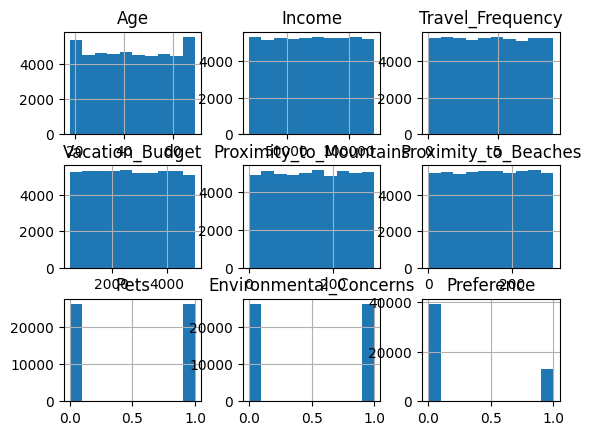

In [4]:
df.hist()

Check if the dataset is balanced.

In [5]:
df['Preference'].value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [6]:
(df.isnull().sum()/len(df)*100).reset_index().rename(columns={'index':'feature',0:'%'})

,feature,%
0,Age,9.999237
1,Gender,0.000000
2,Income,0.000000
3,Education_Level,4.999619
4,Travel_Frequency,0.000000
5,Preferred_Activities,0.000000
6,Vacation_Budget,0.000000
7,Location,0.000000
8,Proximity_to_Mountains,4.999619
9,Proximity_to_Beaches,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

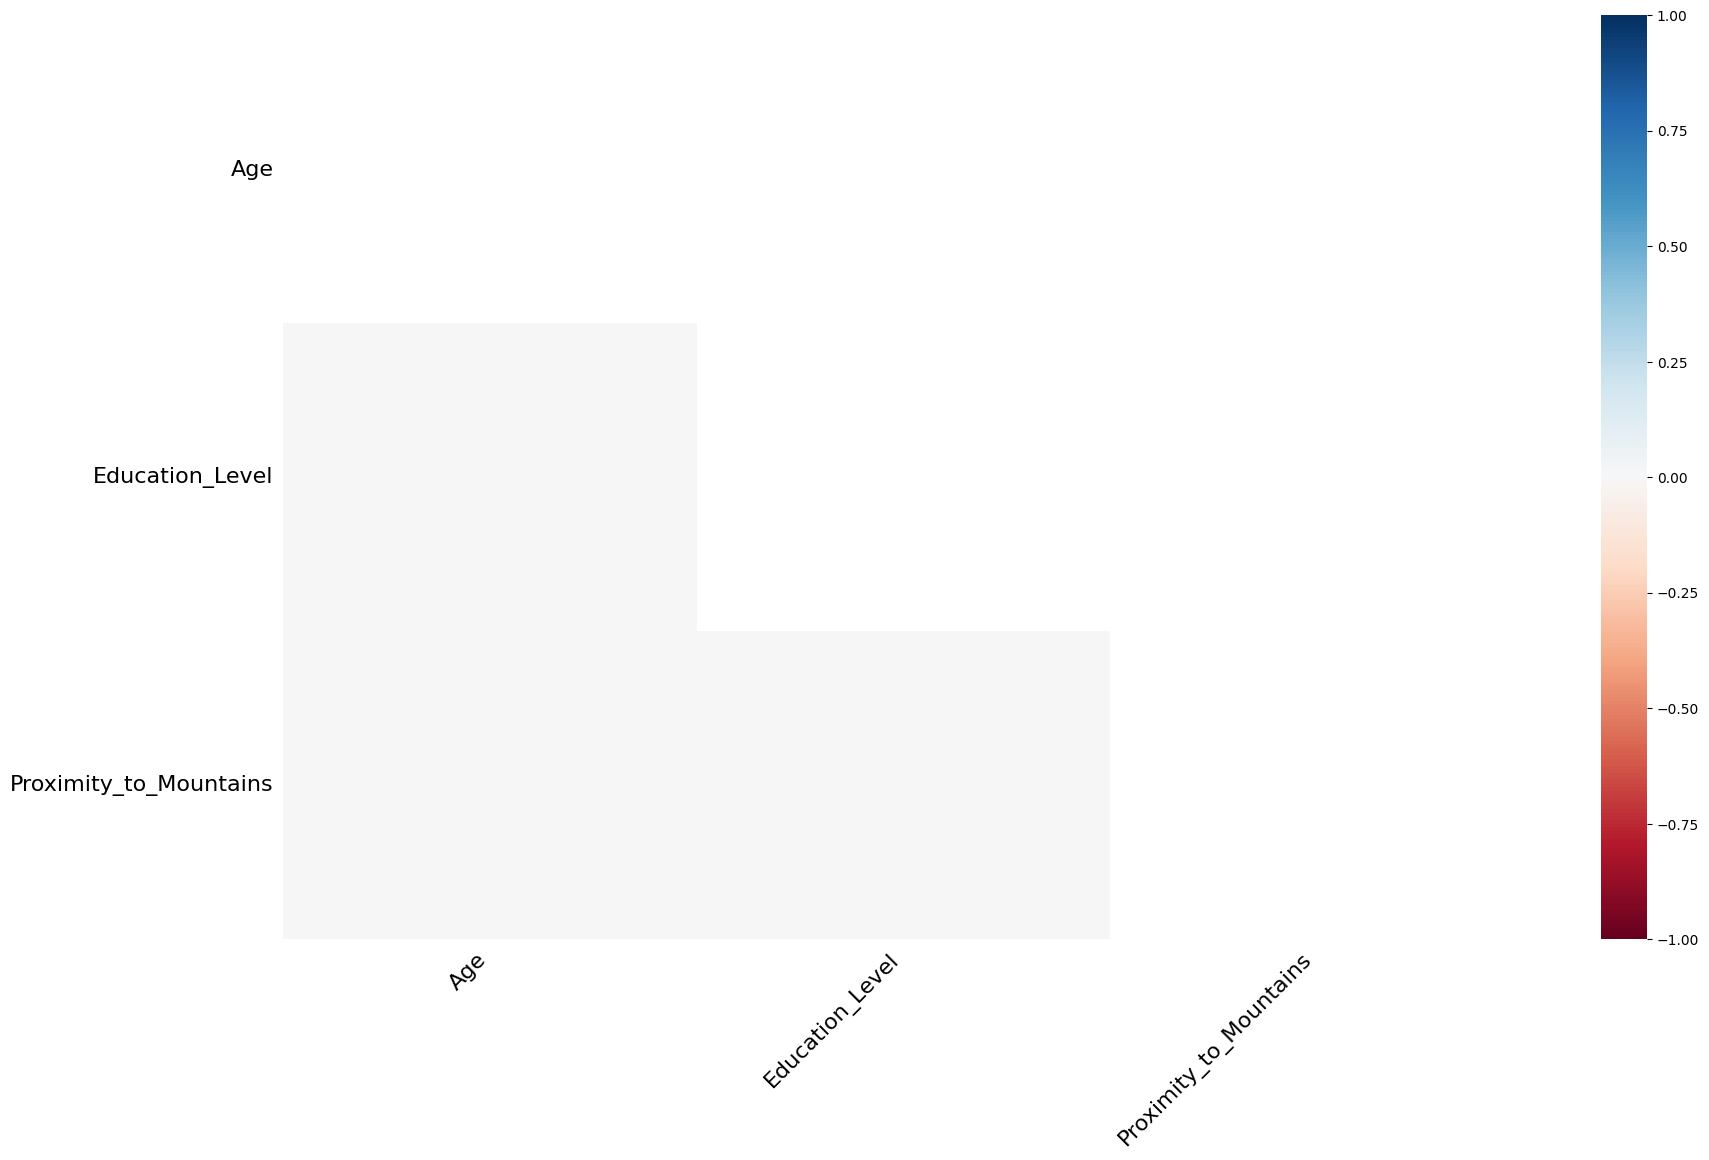

In [7]:
msno.heatmap(df)

<Axes: >

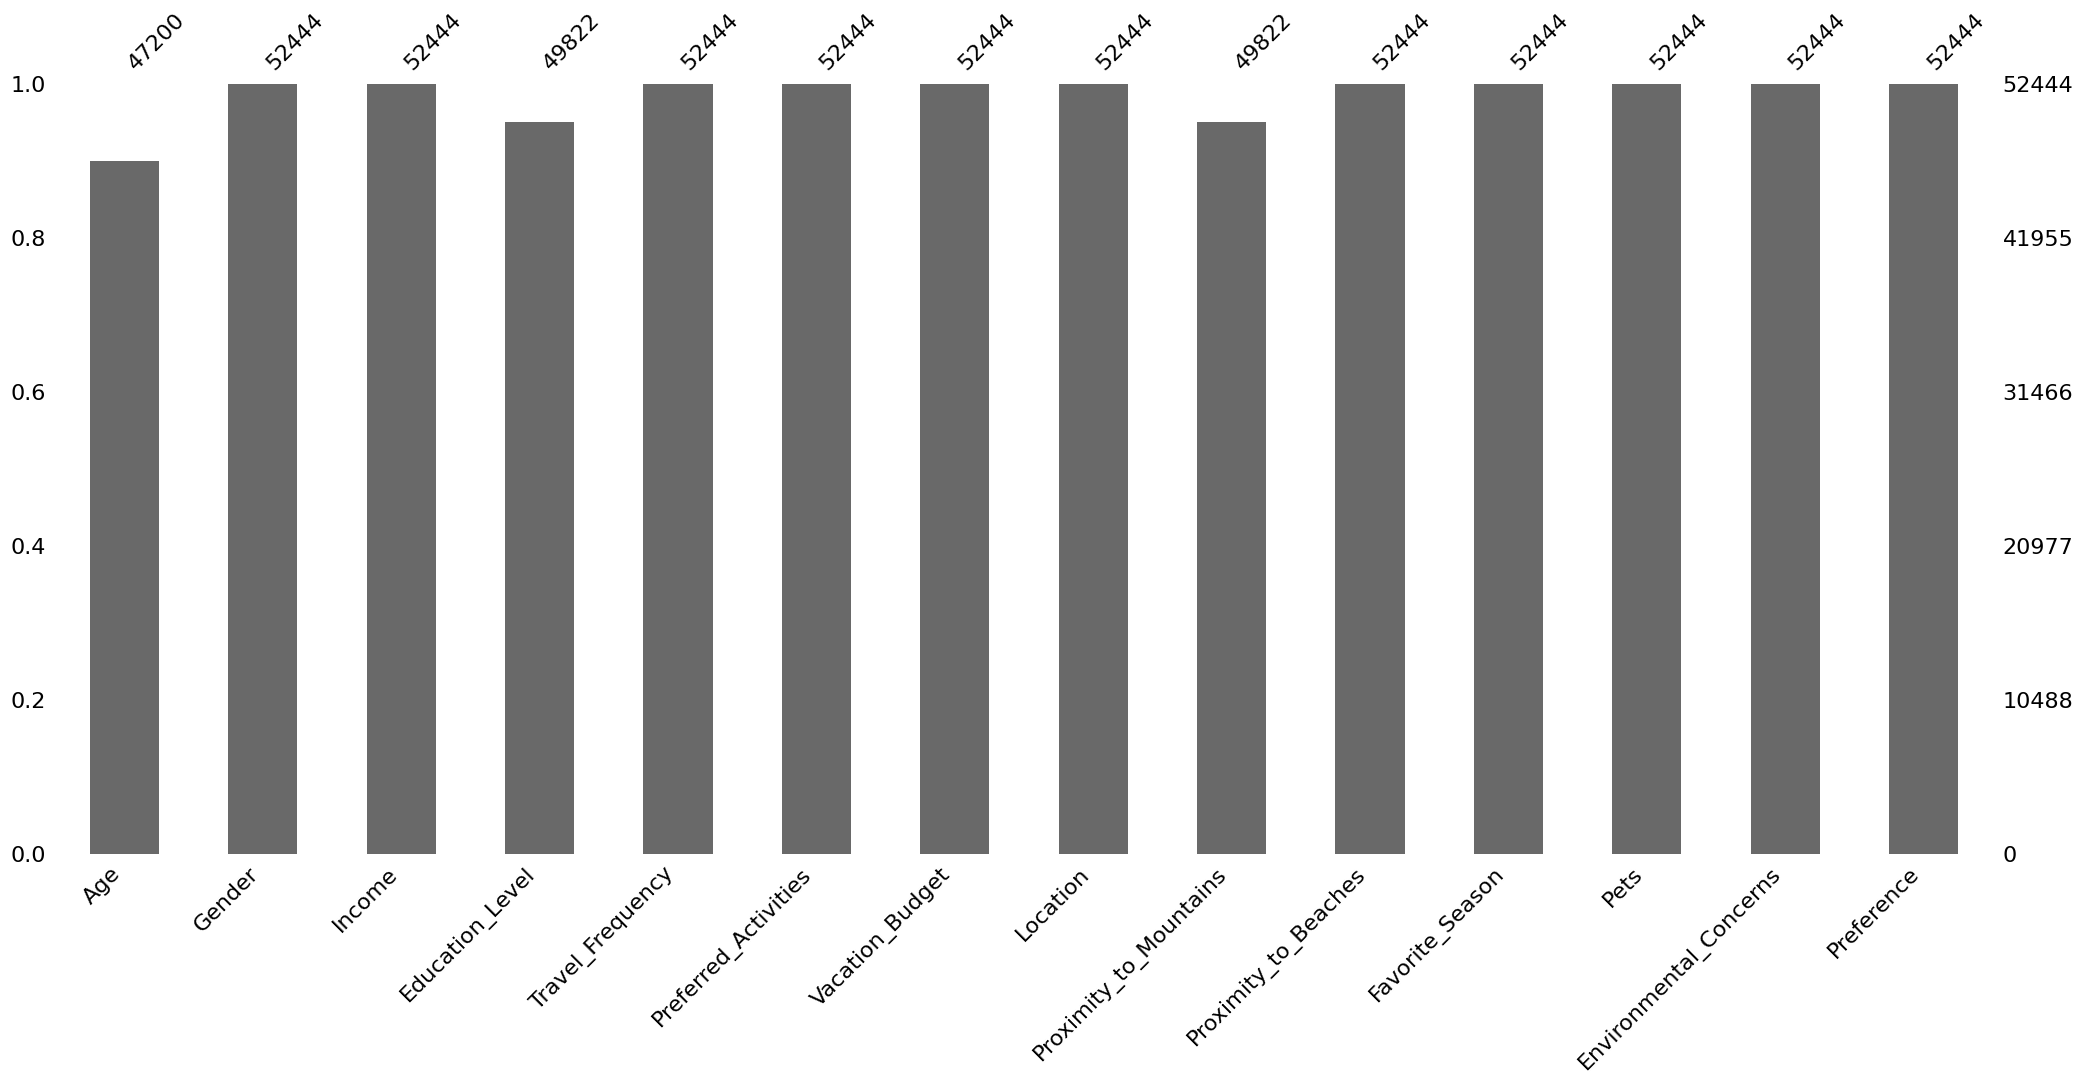

In [8]:
msno.bar(df)

<Axes: >

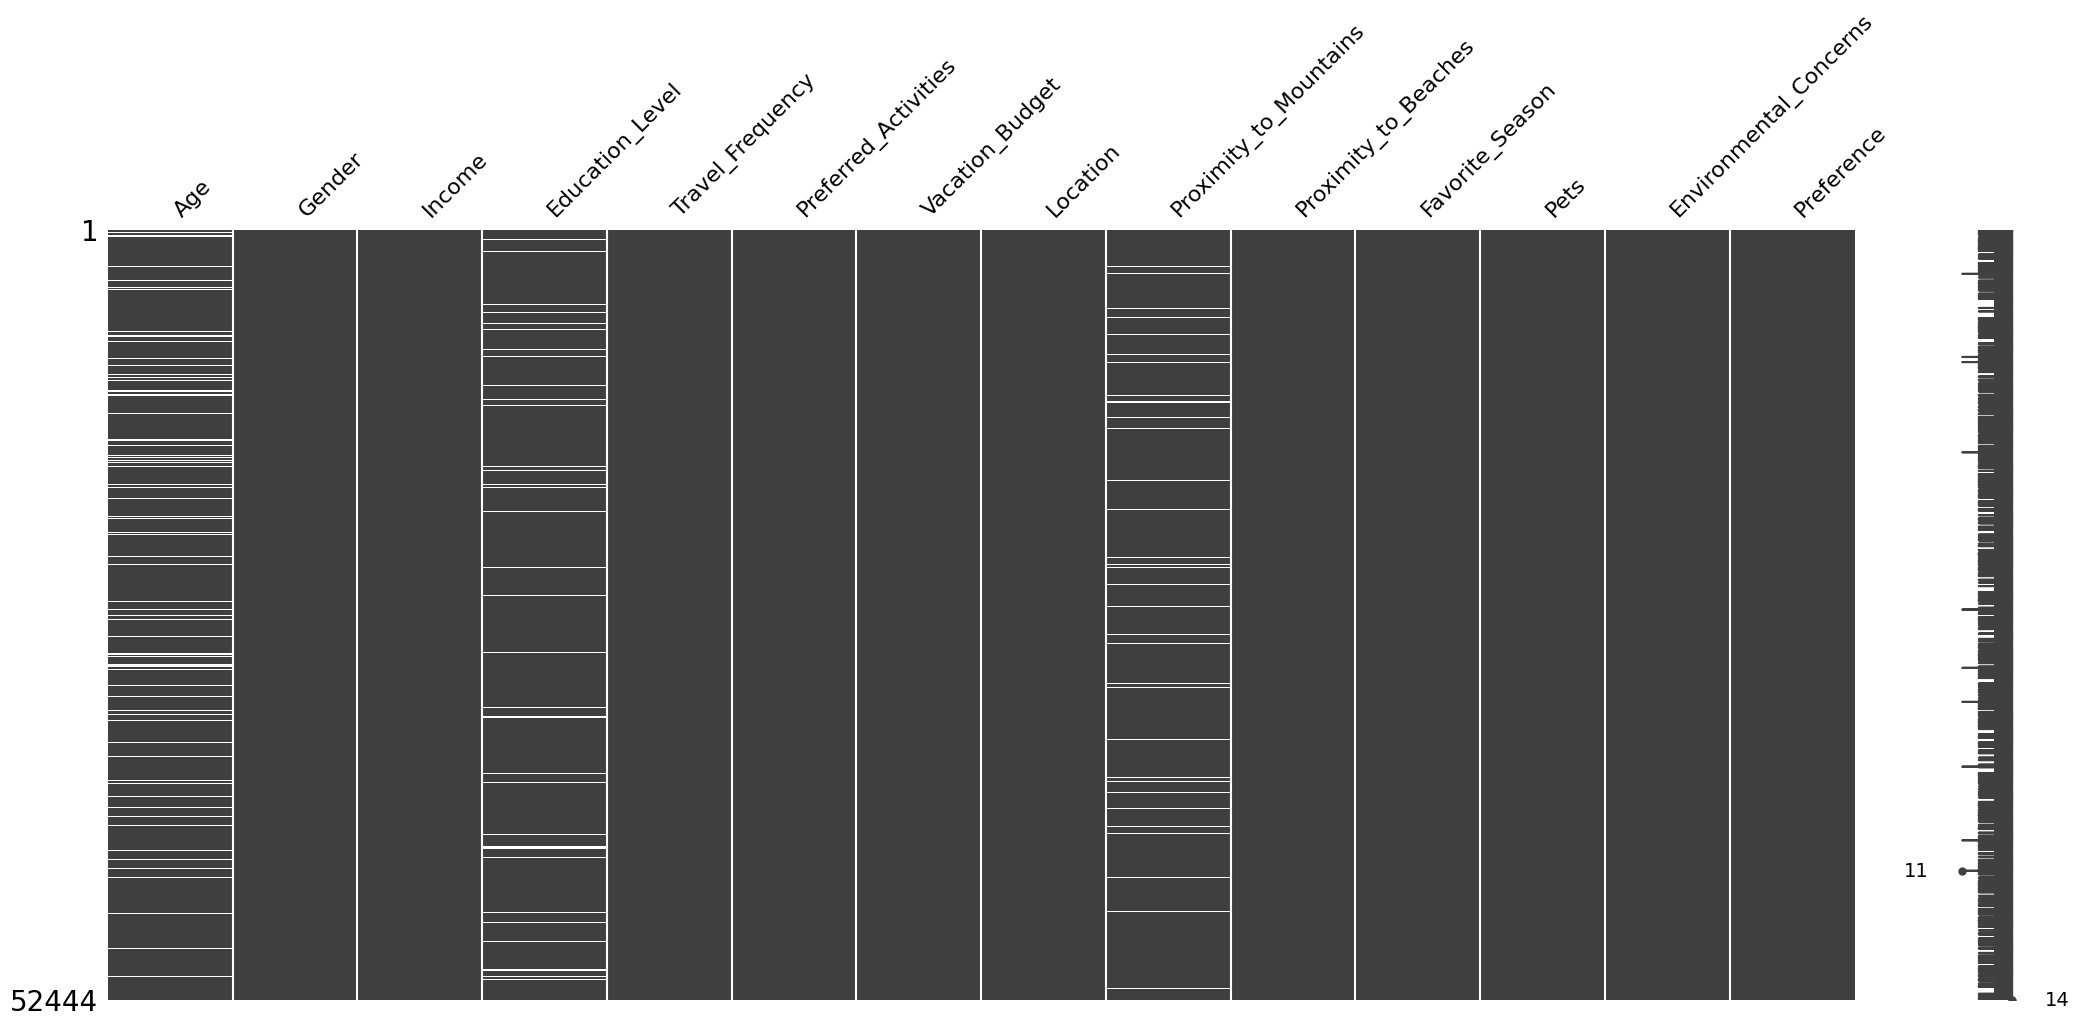

In [9]:
msno.matrix(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [10]:
def drop_data(data:pd.DataFrame, columns:list):
  data_copy = data.copy()
  data_copy.drop(columns, axis=1, inplace=True)
  return data_copy
     

def simple_impute_data(data:pd.DataFrame, columns:list, strategy:str):
  imputer = SimpleImputer(strategy=strategy)
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = imputer.fit_transform(data_copy[[column]])
  return data_copy
     

def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())

    # if 'nan' in encoder.classes_:
    #   data_copy.loc[data_copy[column] == -1, column] = np.nan
  return data_copy

In [11]:
df=drop_data(data=df,columns=['Gender','Education_Level'])
df=simple_impute_data(data=df,columns=['Age','Proximity_to_Mountains'],strategy='mean')
df=label_data(data=df,columns=['Preferred_Activities','Location','Favorite_Season'])

In [12]:
df.isnull().sum()

Age                       0
Income                    0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [13]:
input_data = df.copy()
input_data = drop_data(data=input_data, columns=['Preference'])
target_data = df.copy()['Preference']


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [15]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)
print(x_train_scaled,x_test_scaled)

[[-0.73679927  0.37966858 -0.17237228 ...  1.34247997 -1.004132
  -0.9971201 ]
 [ 0.24965208  0.86662132 -0.5205442  ... -0.44796275  0.995885
  -0.9971201 ]
 [ 0.74287775 -1.71801925  0.52397156 ...  0.44725861 -1.004132
  -0.9971201 ]
 ...
 [-1.37094656  0.77750533  1.56848731 ... -1.34318411  0.995885
  -0.9971201 ]
 [-1.08910332 -1.09566145  1.56848731 ... -1.34318411 -1.004132
  -0.9971201 ]
 [-0.66633846  1.27879141  1.56848731 ... -1.34318411  0.995885
  -0.9971201 ]] [[-0.38449521 -0.35700972  0.87214348 ... -1.34318411  0.995885
  -0.9971201 ]
 [-1.30048575 -0.4767312   0.52397156 ...  1.34247997 -1.004132
   1.00288821]
 [-0.59587765 -1.12654392 -1.56505995 ...  1.34247997  0.995885
   1.00288821]
 ...
 [ 0.00528145 -1.37083389  0.17579964 ... -0.44796275 -1.004132
  -0.9971201 ]
 [ 0.00528145  1.30735422  1.56848731 ...  0.44725861 -1.004132
  -0.9971201 ]
 [ 0.81333856  0.4752588  -0.86871611 ... -1.34318411 -1.004132
   1.00288821]]


## Model Selection

Choose and train an approriate model for the given task.

In [16]:
model=KNeighborsClassifier(n_neighbors=5)

In [17]:
model.fit(x_train_scaled,Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [18]:
y_pred=model.predict(x_test_scaled)

In [19]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(10489,))

Assess the performance of the model by using different classification metrics.

In [20]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9357422061206979
[[7573  243]
 [ 431 2242]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7816
           1       0.90      0.84      0.87      2673

    accuracy                           0.94     10489
   macro avg       0.92      0.90      0.91     10489
weighted avg       0.93      0.94      0.93     10489



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [21]:
X = df.drop(columns='Preference')
y = df['Preference']

# Optional: Convert categorical features if needed
X = pd.get_dummies(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
y_pred = best_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)